In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importing seaborn library
# import seaborn as sns

import sys
import os

In [2]:
########################################################
# Load the data
########################################################
n_individuals_chikwawa          = np.load("Data/Input/n_individuals_chikwawa.npy")
n_households_chikwawa           = np.load("Data/Input/n_households_chikwawa.npy")
households_longitude_chikwawa   = np.load("Data/Input/households_longitude_chikwawa.npy")
households_latitude_chikwawa    = np.load("Data/Input/households_latitude_chikwawa.npy")
loc_H_I_index_chikwawa          = np.load("Data/Input/loc_H_I_index_chikwawa.npy")
individuals_covariates_chikwawa = np.load("Data/Input/individuals_covariates_chikwawa.npy")

Y_ecoli_chikwawa                = np.load("Data/Input/Y_ecoli_chikwawa.npy")
detected_individuals_chikwawa   = np.load("Data/Input/detected_individuals_chikwawa.npy")


n_individuals_chileka          = np.load("Data/Input/n_individuals_chileka.npy")
n_households_chileka           = np.load("Data/Input/n_households_chileka.npy")
households_longitude_chileka   = np.load("Data/Input/households_longitude_chileka.npy")
households_latitude_chileka    = np.load("Data/Input/households_latitude_chileka.npy")
loc_H_I_index_chileka          = np.load("Data/Input/loc_H_I_index_chileka.npy")
individuals_covariates_chileka = np.load("Data/Input/individuals_covariates_chileka.npy")

Y_ecoli_chileka                = np.load("Data/Input/Y_ecoli_chileka.npy")
detected_individuals_chileka   = np.load("Data/Input/detected_individuals_chileka.npy")


n_individuals_ndirande          = np.load("Data/Input/n_individuals_ndirande.npy")
n_households_ndirande           = np.load("Data/Input/n_households_ndirande.npy")
households_longitude_ndirande   = np.load("Data/Input/households_longitude_ndirande.npy")
households_latitude_ndirande    = np.load("Data/Input/households_latitude_ndirande.npy")
loc_H_I_index_ndirande          = np.load("Data/Input/loc_H_I_index_ndirande.npy")
individuals_covariates_ndirande = np.load("Data/Input/individuals_covariates_ndirande.npy")

Y_ecoli_ndirande                = np.load("Data/Input/Y_ecoli_ndirande.npy")
detected_individuals_ndirande   = np.load("Data/Input/detected_individuals_ndirande.npy")

In [3]:
sys.path.append('../Scripts/SMC2')
from SyntheticHouseholds import *

In [4]:
H_chikwawa = households_individuals(n_individuals_chikwawa, n_households_chikwawa, households_longitude_chikwawa, households_latitude_chikwawa, loc_H_I_index_chikwawa, individuals_covariates_chikwawa)

H_chileka = households_individuals(n_individuals_chileka, n_households_chileka, households_longitude_chileka, households_latitude_chileka, loc_H_I_index_chileka, individuals_covariates_chileka)

H_ndirande = households_individuals(n_individuals_ndirande, n_households_ndirande, households_longitude_ndirande, households_latitude_ndirande, loc_H_I_index_ndirande, individuals_covariates_ndirande)

# Available data

In [5]:
observed_house_index_chikwawa = np.unique(loc_H_I_index_chikwawa[0:Y_ecoli_chikwawa.shape[0], 0])
observed_house_index_chileka  = np.unique(loc_H_I_index_chileka[ 0:Y_ecoli_chileka.shape[0] , 0])
observed_house_index_ndirande = np.unique(loc_H_I_index_ndirande[0:Y_ecoli_ndirande.shape[0], 0])

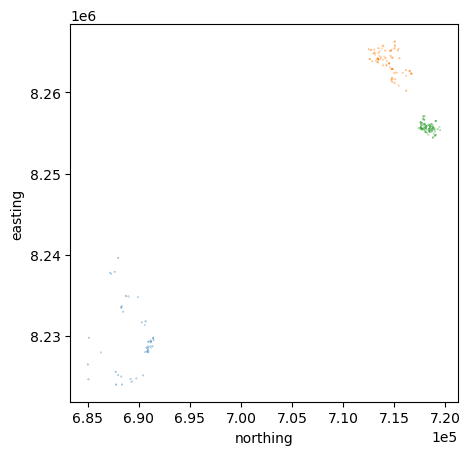

In [6]:
fig, (ax) = plt.subplots(1, 1, figsize=(5, 5), dpi=100)

ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

ax.set_xlabel('northing', fontsize=10)
ax.set_ylabel('easting', fontsize=10)

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)



ax.scatter(H_chikwawa.households_longitude.numpy()[observed_house_index_chikwawa], H_chikwawa.households_latitude.numpy()[observed_house_index_chikwawa], s = 0.01*H_chikwawa.households_size.numpy()[observed_house_index_chikwawa])
ax.scatter(H_chileka.households_longitude.numpy()[ observed_house_index_chileka ], H_chileka.households_latitude.numpy()[ observed_house_index_chileka ], s = 0.01*H_chileka.households_size.numpy()[observed_house_index_chileka])
ax.scatter(H_ndirande.households_longitude.numpy()[observed_house_index_ndirande], H_ndirande.households_latitude.numpy()[observed_house_index_ndirande], s = 0.01*H_ndirande.households_size.numpy()[observed_house_index_ndirande])

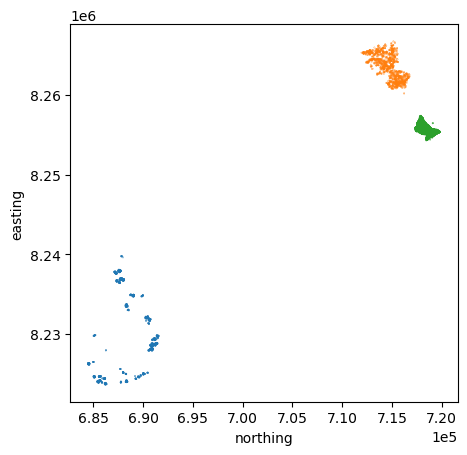

In [7]:
fig, (ax) = plt.subplots(1, 1, figsize=(5, 5), dpi=100)

ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

ax.set_xlabel('northing', fontsize=10)
ax.set_ylabel('easting', fontsize=10)

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)



ax.scatter(H_chikwawa.households_longitude.numpy(), H_chikwawa.households_latitude.numpy(), s = 0.01*H_chikwawa.households_size.numpy())
ax.scatter(H_chileka.households_longitude.numpy(), H_chileka.households_latitude.numpy(), s = 0.01*H_chileka.households_size.numpy())
ax.scatter(H_ndirande.households_longitude.numpy(), H_ndirande.households_latitude.numpy(), s = 0.01*H_ndirande.households_size.numpy())

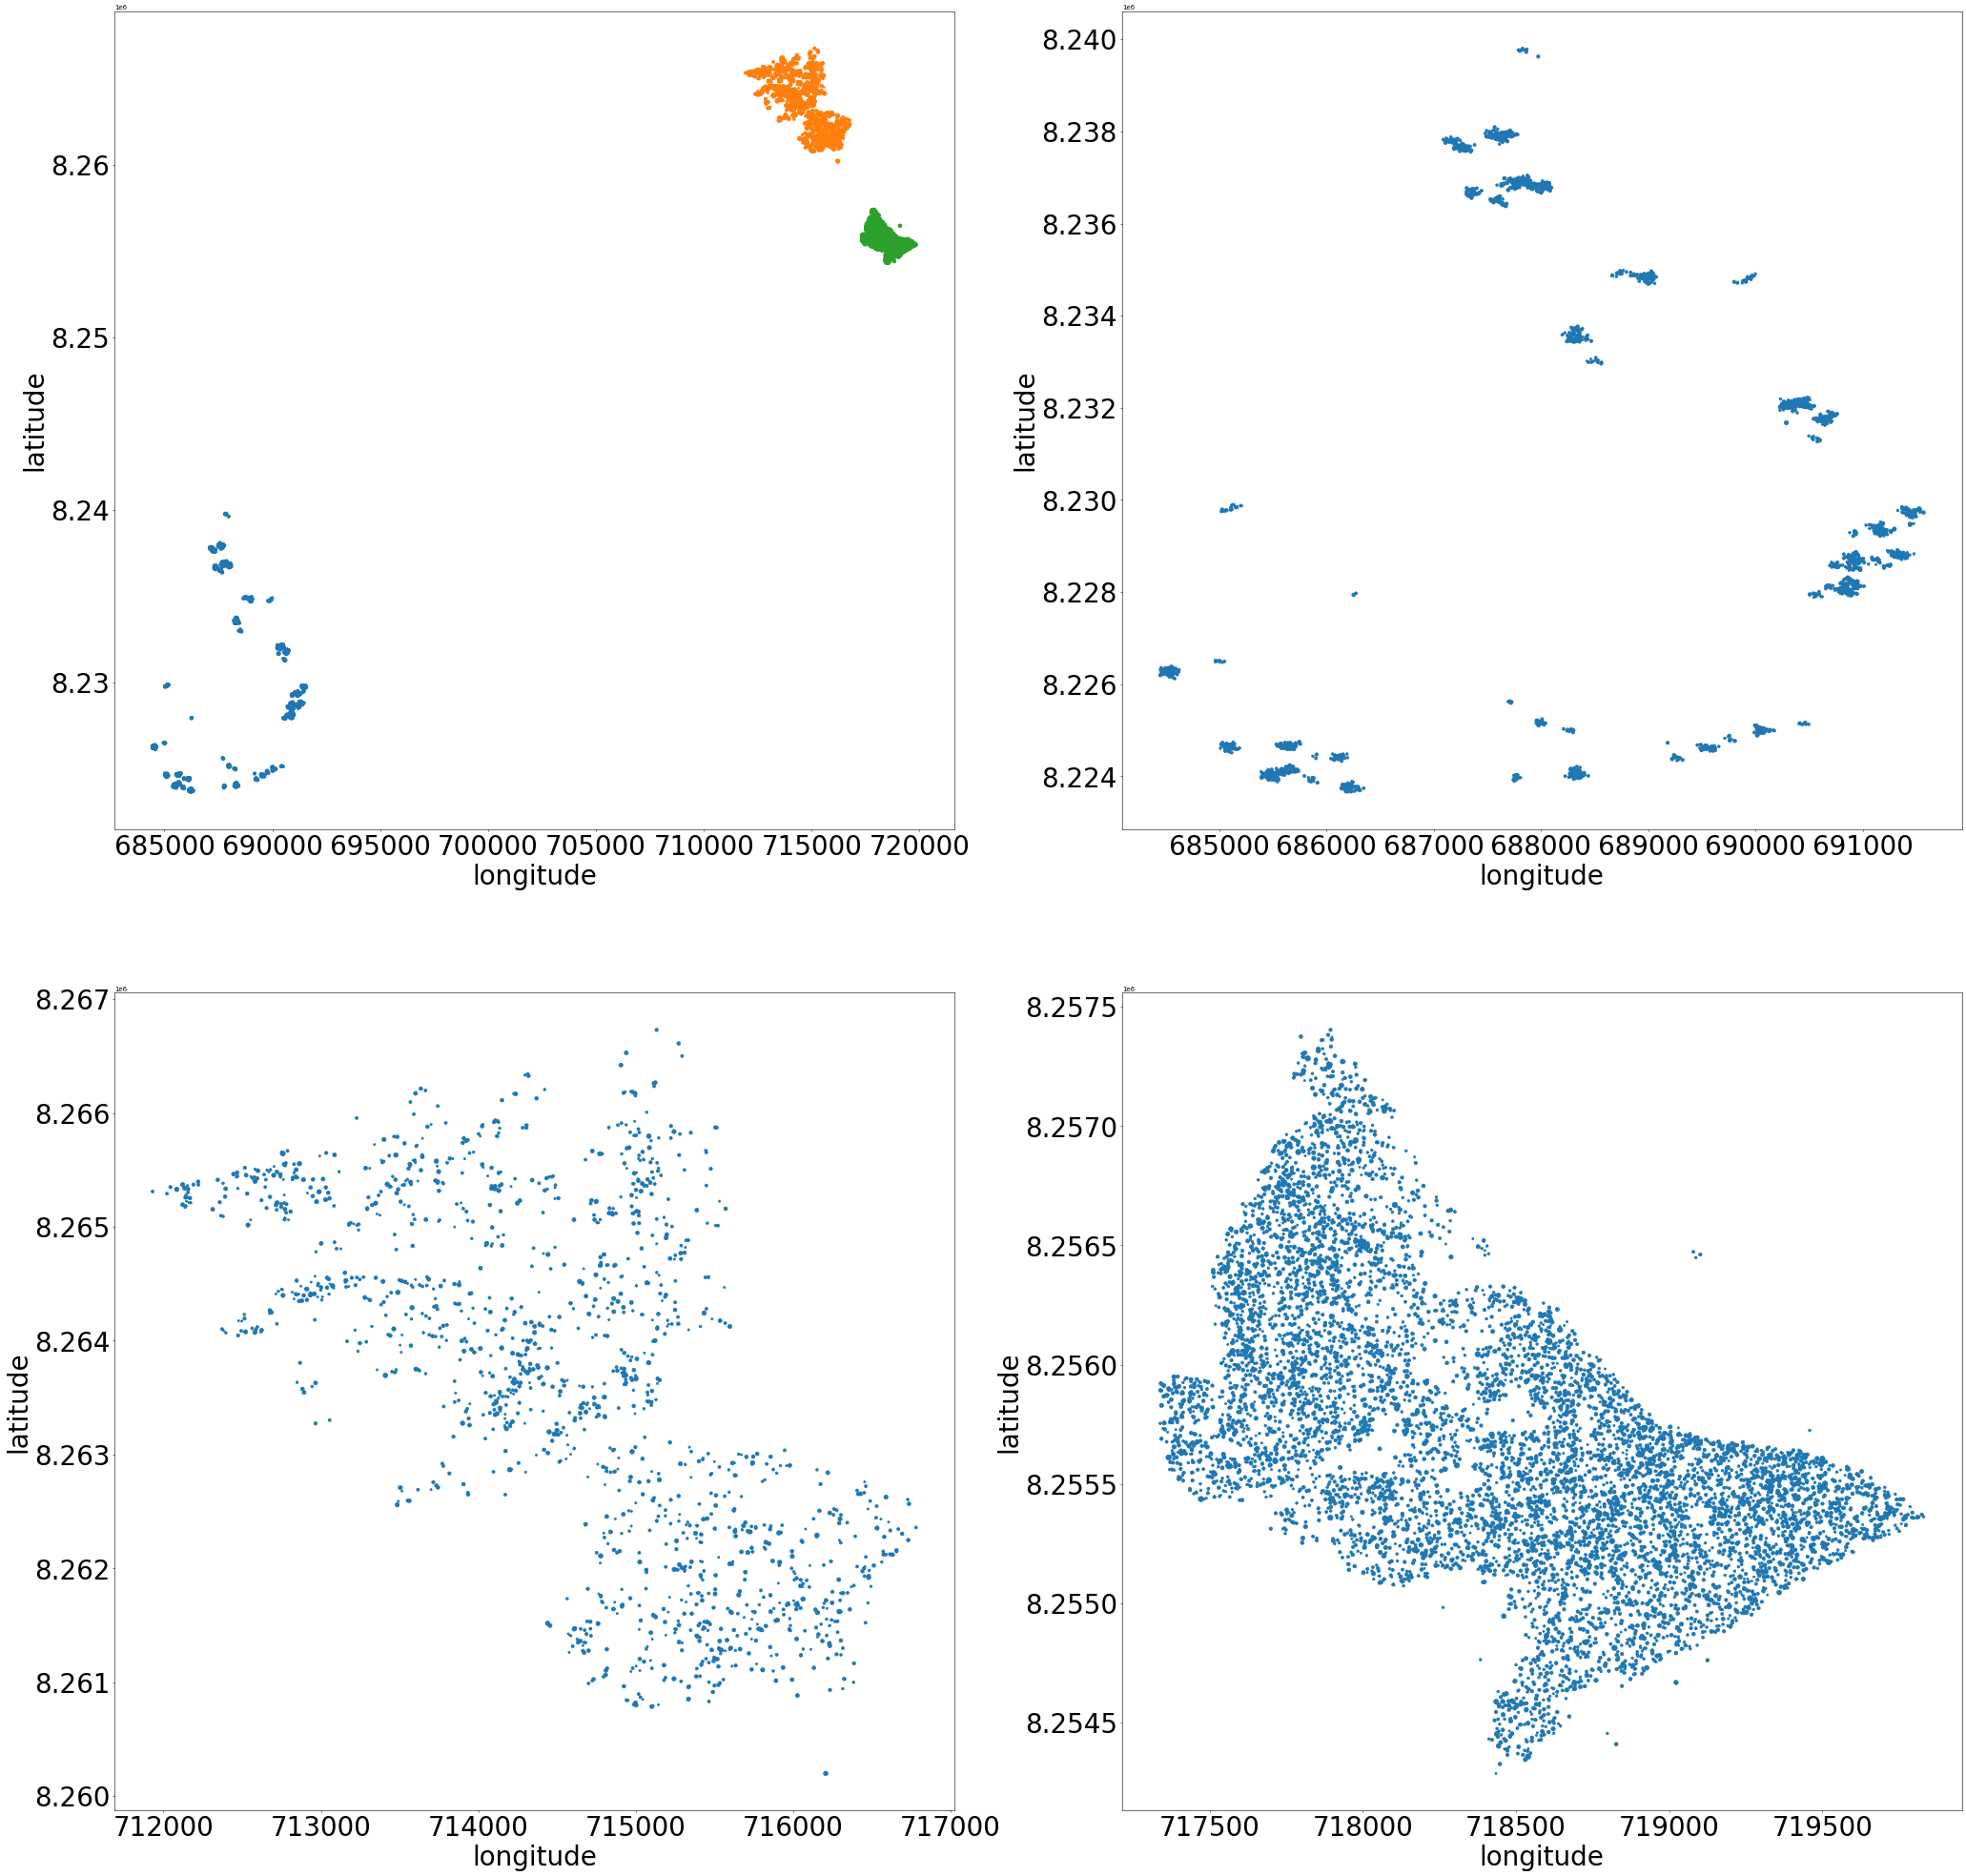

In [8]:
fig, (ax) = plt.subplots(2, 2, figsize=(50, 50), dpi=50)


ax[0,0].set_xlabel('longitude', fontsize=40)
ax[0,0].set_ylabel('latitude', fontsize=40)

ax[0,0].xaxis.set_tick_params(labelsize=40)
ax[0,0].yaxis.set_tick_params(labelsize=40)

ax[0,0].scatter(H_chikwawa.households_longitude.numpy(), H_chikwawa.households_latitude.numpy(), s = 5*H_chikwawa.households_size)
ax[0,0].scatter(H_chileka.households_longitude.numpy(), H_chileka.households_latitude.numpy(), s = 5*H_chileka.households_size)
ax[0,0].scatter(H_ndirande.households_longitude.numpy(), H_ndirande.households_latitude.numpy(), s = 5*H_ndirande.households_size)


ax[0,1].set_xlabel('longitude', fontsize=40)
ax[0,1].set_ylabel('latitude', fontsize=40)

ax[0,1].xaxis.set_tick_params(labelsize=40)
ax[0,1].yaxis.set_tick_params(labelsize=40)

ax[0,1].scatter(H_chikwawa.households_longitude.numpy(), H_chikwawa.households_latitude.numpy(), s = 5*H_chikwawa.households_size)


ax[1,0].set_xlabel('longitude', fontsize=40)
ax[1,0].set_ylabel('latitude', fontsize=40)

ax[1,0].xaxis.set_tick_params(labelsize=40)
ax[1,0].yaxis.set_tick_params(labelsize=40)

ax[1,0].scatter(H_chileka.households_longitude.numpy(), H_chileka.households_latitude.numpy(), s = 5*H_chileka.households_size)


ax[1,1].set_xlabel('longitude', fontsize=40)
ax[1,1].set_ylabel('latitude', fontsize=40)

ax[1,1].xaxis.set_tick_params(labelsize=40)
ax[1,1].yaxis.set_tick_params(labelsize=40)

ax[1,1].scatter(H_ndirande.households_longitude.numpy(), H_ndirande.households_latitude.numpy(), s = 5*H_ndirande.households_size)

# Read output

In [9]:
sys.path.append('../Scripts/Reading')
from check_data import *
from reading import *

In [10]:
str_list = ["2beta_noseason_80", 
            "2beta_noseason_80_nocoef_2",
            "2beta_sqrt_noseason_nocoef_allprop", 
            "2beta_sqrt_noseason_80_allprop", 
            "2beta_sqrt_noseason_nocoef_allprop_2",]

size = 4

theta = {}
p_y_t_given_y_1_to_tm1 = {}
rejuvenation_time = {}

for str_ in str_list:
    print(str_)
    path = "Data/Output/"+str_

    theta[str_], p_y_t_given_y_1_to_tm1[str_], rejuvenation_time[str_] = read_output(path, size)

2beta_noseason_80
2beta_noseason_80_nocoef_2
2beta_sqrt_noseason_nocoef_allprop
2beta_sqrt_noseason_80_allprop
2beta_sqrt_noseason_nocoef_allprop_2


In [11]:
for str_ in str_list:
    print(str_)
    for j in range(1, size+1):
        print("For simulation "+str(j))
        print("Number of different values in posterior sample chikwawa ", len(np.unique(theta[str_]["chikwawa"][str(j)][:,0,-1])))
        print("Number of different values in posterior sample chileka ",  len(np.unique(theta[str_]["chileka"][ str(j)][:,0,-1])))
        print("Number of different values in posterior sample ndirande ", len(np.unique(theta[str_]["ndirande"][str(j)][:,0,-1])))
        print("#################################################################################################")

2beta_noseason_80
For simulation 1
Number of different values in posterior sample chikwawa  121
Number of different values in posterior sample chileka  149
Number of different values in posterior sample ndirande  61
#################################################################################################
For simulation 2
Number of different values in posterior sample chikwawa  104
Number of different values in posterior sample chileka  17
Number of different values in posterior sample ndirande  72
#################################################################################################
For simulation 3
Number of different values in posterior sample chikwawa  139
Number of different values in posterior sample chileka  161
Number of different values in posterior sample ndirande  49
#################################################################################################
For simulation 4
Number of different values in posterior sample chikwawa  100
Number of differe

In [12]:
for str_ in str_list:
    print(str_)
    for j in range(1, size+1):
        print("For simulation "+str(j))
        print("Log marginal likelihood chikwawa ", np.sum(np.log(p_y_t_given_y_1_to_tm1[str_]["chikwawa"][str(j)])))
        print("Log marginal likelihood chileka ",  np.sum(np.log(p_y_t_given_y_1_to_tm1[str_]["chileka"][str(j)])))
        print("Log marginal likelihood ndirande ", np.sum(np.log(p_y_t_given_y_1_to_tm1[str_]["ndirande"][str(j)])))
        print("#################################################################################################")

2beta_noseason_80
For simulation 1
Log marginal likelihood chikwawa  -409.00354
Log marginal likelihood chileka  -557.98865
Log marginal likelihood ndirande  -569.7361
#################################################################################################
For simulation 2
Log marginal likelihood chikwawa  -415.34814
Log marginal likelihood chileka  -554.3055
Log marginal likelihood ndirande  -563.1736
#################################################################################################
For simulation 3
Log marginal likelihood chikwawa  -436.27594
Log marginal likelihood chileka  -526.61017
Log marginal likelihood ndirande  -565.40967
#################################################################################################
For simulation 4
Log marginal likelihood chikwawa  -404.87958
Log marginal likelihood chileka  -559.8785
Log marginal likelihood ndirande  -557.9765
#########################################################################################

In [13]:
from scipy.stats import beta

def beta_pdf(x, parameters):
    
    a, b = parameters
    
    return beta.pdf(x, a, b)

def gamma_pdf(x, parameters):
    
    k, theta = parameters
    
    return (1/(scipy.special.gamma(k)*(theta**k)))*(x**(k-1))*np.exp(-x/theta)

def gaussian_pdf(x, parameters):
    
    mu, sigma = parameters
    
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mu)/sigma)**2)

# Bayes factor

In [14]:
best_simulation = {}
for str_ in str_list:
    
    best_simulation[str_] = find_best_simulation(p_y_t_given_y_1_to_tm1[str_])

In [15]:
best, second_best = find_two_best(p_y_t_given_y_1_to_tm1, best_simulation, str_list)

In [16]:
for city in best.keys():
    print("##############################################################")
    print("In "+ city+ " the best model is "+best[city][0]+" followed by "+second_best[city][0])
    print("The log Bayes factor is ", str(best[city][1]-second_best[city][1]))

##############################################################
In chikwawa the best model is 2beta_sqrt_noseason_nocoef_allprop followed by 2beta_sqrt_noseason_nocoef_allprop_2
The log Bayes factor is  1.1731567
##############################################################
In chileka the best model is 2beta_sqrt_noseason_nocoef_allprop_2 followed by 2beta_sqrt_noseason_nocoef_allprop
The log Bayes factor is  2.0686646
##############################################################
In ndirande the best model is 2beta_sqrt_noseason_nocoef_allprop_2 followed by 2beta_sqrt_noseason_nocoef_allprop
The log Bayes factor is  11.361267


In [19]:
for city in best.keys():
    print("Number of different values in posterior sample "+city, len(np.unique(theta[best[city][0]][city][best_simulation[best[city][0]][city]][:,0,-1])))
    print("#################################################################################################")

Number of different values in posterior sample chikwawa 92
#################################################################################################
Number of different values in posterior sample chileka 148
#################################################################################################
Number of different values in posterior sample ndirande 46
#################################################################################################


In [20]:
for city in second_best.keys():
    print("Number of different values in posterior sample "+city, len(np.unique(theta[second_best[city][0]][city][best_simulation[second_best[city][0]][city]][:,0,-1])))
    print("#################################################################################################")

Number of different values in posterior sample chikwawa 103
#################################################################################################
Number of different values in posterior sample chileka 135
#################################################################################################
Number of different values in posterior sample ndirande 44
#################################################################################################


Store the best combination

In [101]:
# for city in best.keys(): 
#     theta_best = theta[best[city][0]][city][best_simulation[best[city][0]][city]][np.random.choice(range(0,150), 50),:,-1]
#     np.save("Data/BestParameterstheta_best_"+city+"_klebs.npy", theta_best)

# Results

## Plot the traceplots

# $\beta_1$

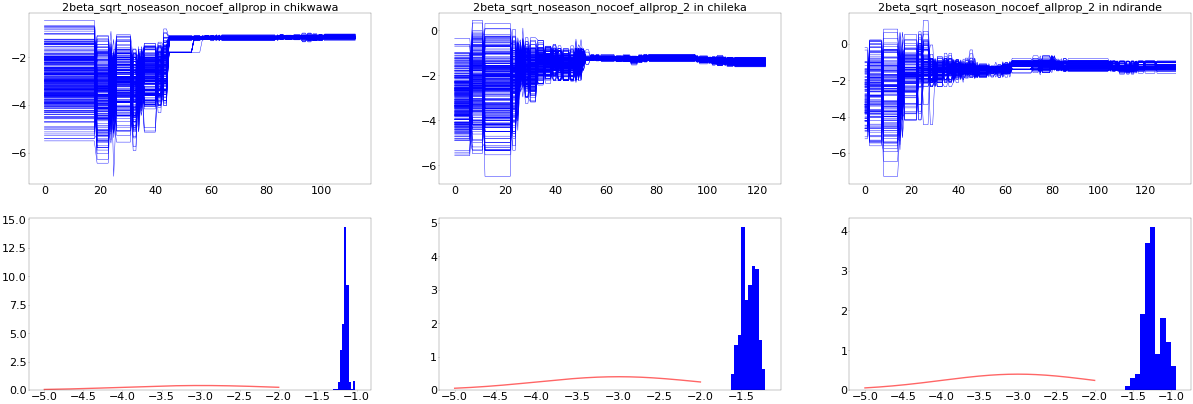

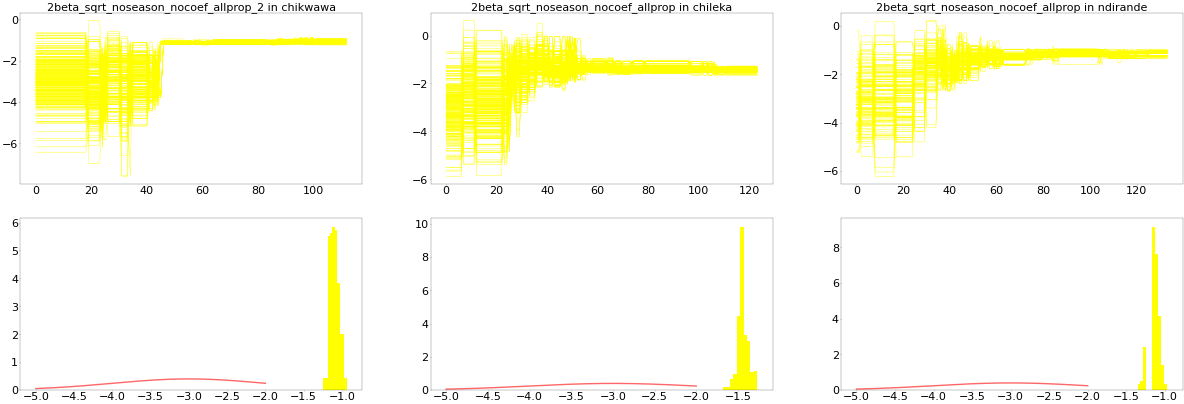

In [22]:
colors = ["red", "green", "blue", "yellow"]

prior_dict = {}
prior_dict["func"] = gaussian_pdf
prior_dict["x"] = np.linspace(-5, -2, 500)
prior_dict["parameters"] = (-3, 1)

plot_parameter_best(theta, best, best_simulation, [0, 0, 0], prior_dict, "blue")
plot_parameter_best(theta, second_best, best_simulation, [0, 0, 0], prior_dict, "yellow")

# $\beta_2$

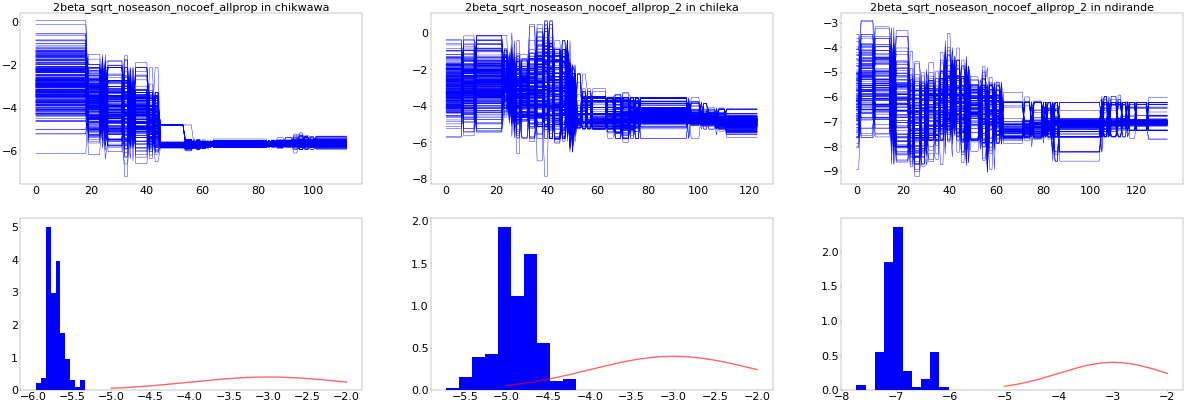

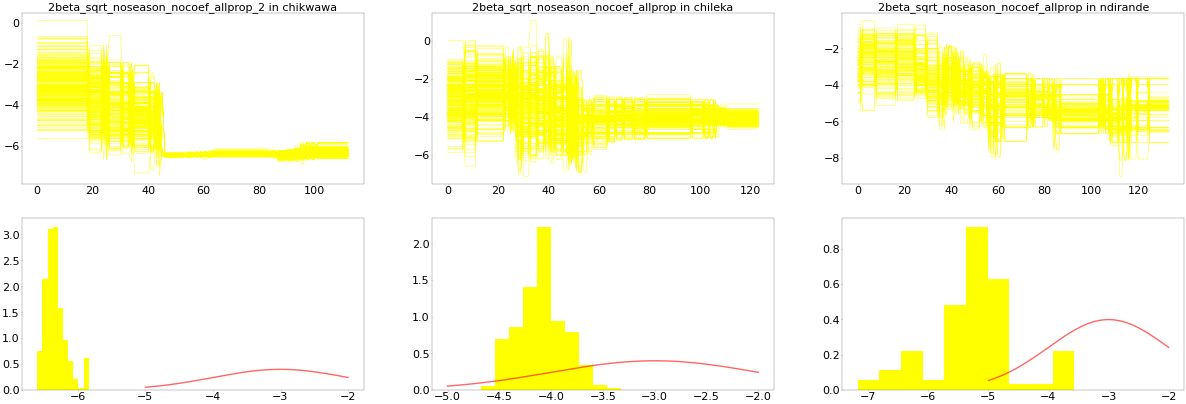

In [23]:
colors = ["red", "green", "blue", "yellow"]

prior_dict = {}
prior_dict["func"] = gaussian_pdf
prior_dict["x"] = np.linspace(-5, -2, 500)
prior_dict["parameters"] = (-3, 1)

plot_parameter_best(theta, best, best_simulation, [1, 1, 1], prior_dict, "blue")
plot_parameter_best(theta, second_best, best_simulation, [1, 1, 1], prior_dict, "yellow")

# $\phi$

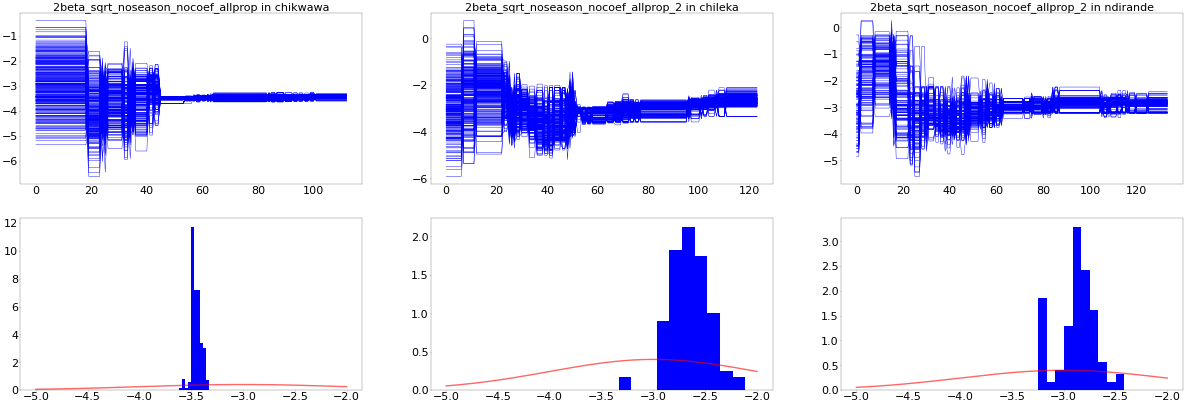

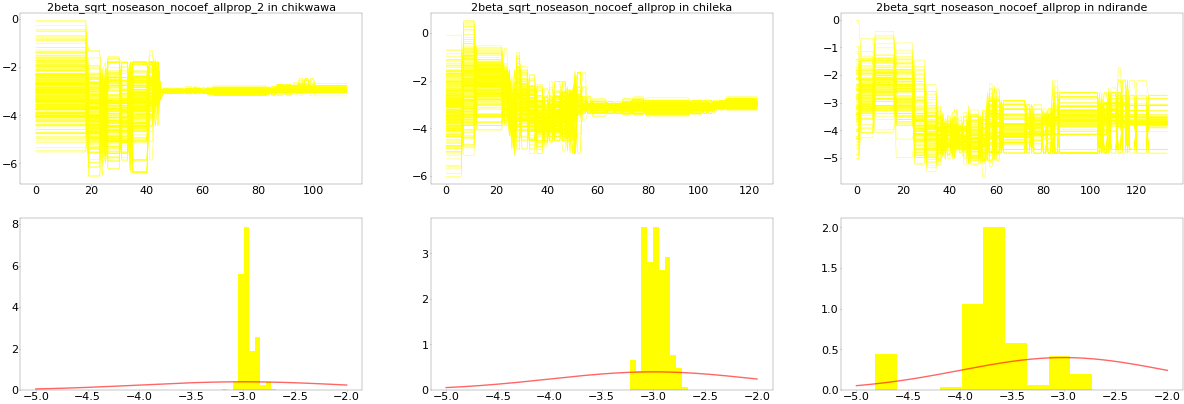

In [24]:
colors = ["red", "green", "blue", "yellow"]

prior_dict = {}
prior_dict["func"] = gaussian_pdf
prior_dict["x"] = np.linspace(-5, -2, 500)
prior_dict["parameters"] = (-3, 1)

plot_parameter_best(theta, best, best_simulation, [2, 2, 2], prior_dict, "blue")
plot_parameter_best(theta, second_best, best_simulation, [2, 2, 2], prior_dict, "yellow")

## Posterior over colonization given the data

In [30]:
house_state_chikwawa = np.load("Data/Particles/chikwawa_filtering_ecoli_households.npy")
house_state_chileka  = np.load("Data/Particles/chileka_filtering_ecoli_households.npy")
house_state_ndirande = np.load("Data/Particles/ndirande_filtering_ecoli_households.npy")

R_t_chikwawa = np.load("Data/Particles/chikwawa_filtering_ecoli_Rt.npy")
R_t_chileka  = np.load("Data/Particles/chileka_filtering_ecoli_Rt.npy")
R_t_ndirande = np.load("Data/Particles/ndirande_filtering_ecoli_Rt.npy")

Visualize the data with a households scatterplot. Red and dot size are associated to higher colonization.

### Colonization map

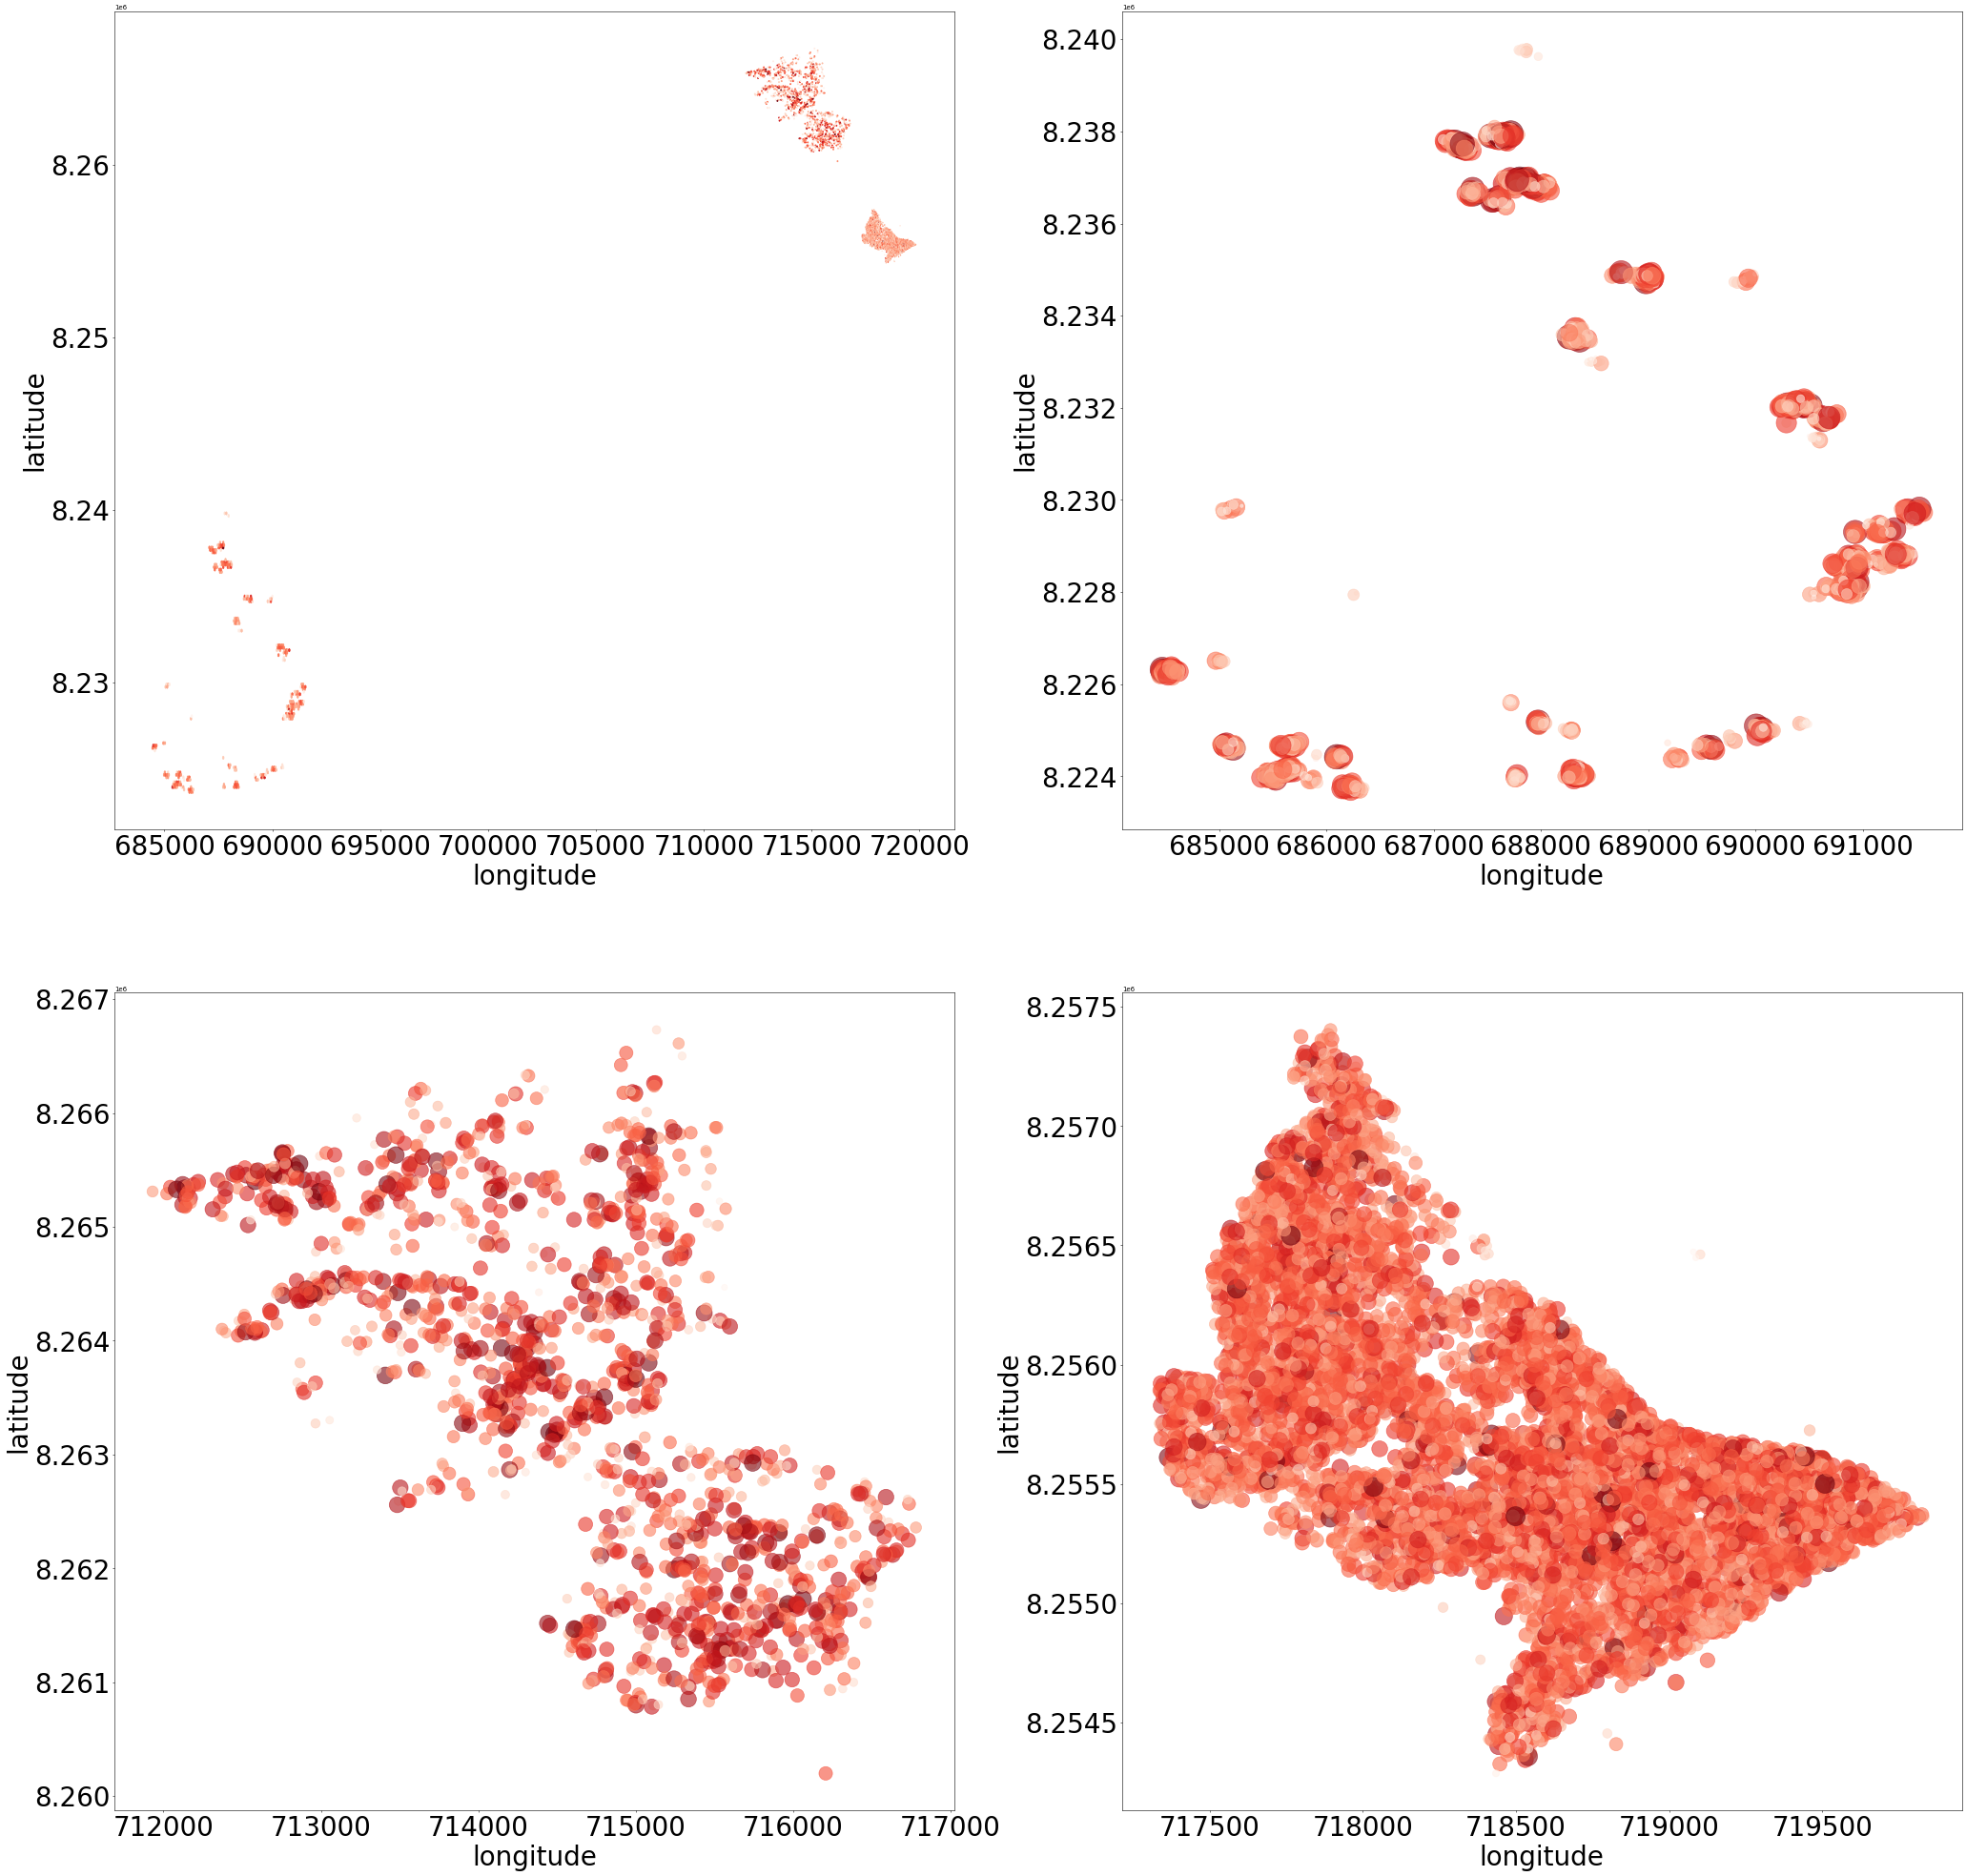

In [31]:
fig, (ax) = plt.subplots(2, 2, figsize=(50, 50), dpi=50)


ax[0,0].set_xlabel('longitude', fontsize=40)
ax[0,0].set_ylabel('latitude', fontsize=40)

ax[0,0].xaxis.set_tick_params(labelsize=40)
ax[0,0].yaxis.set_tick_params(labelsize=40)

ax[0,0].hexbin(H_chikwawa.households_longitude.numpy().ravel(), H_chikwawa.households_latitude.numpy().ravel(), C = np.mean(np.nanmean(house_state_chikwawa, axis = 0), axis = 1), cmap="Reds", bins=100)
ax[0,0].hexbin(H_chileka.households_longitude.numpy().ravel(), H_chileka.households_latitude.numpy().ravel(),   C = np.mean(np.nanmean(house_state_chileka,  axis = 0), axis = 1), cmap="Reds", bins=100)
ax[0,0].hexbin(H_ndirande.households_longitude.numpy().ravel(), H_ndirande.households_latitude.numpy().ravel(), C = np.mean(np.nanmean(house_state_ndirande, axis = 0), axis = 1), cmap="Reds", bins=100)


ax[0,1].set_xlabel('longitude', fontsize=40)
ax[0,1].set_ylabel('latitude', fontsize=40)

ax[0,1].xaxis.set_tick_params(labelsize=40)
ax[0,1].yaxis.set_tick_params(labelsize=40)

ax[0,1].scatter(H_chikwawa.households_longitude.numpy(), H_chikwawa.households_latitude.numpy(), c = np.mean(np.nanmean(house_state_chikwawa, axis = 0), axis = 1), cmap="Reds", s = 300*np.mean(np.mean(house_state_chikwawa, axis = 0), axis = 1), alpha = 0.6)


ax[1,0].set_xlabel('longitude', fontsize=40)
ax[1,0].set_ylabel('latitude', fontsize=40)

ax[1,0].xaxis.set_tick_params(labelsize=40)
ax[1,0].yaxis.set_tick_params(labelsize=40)

ax[1,0].scatter(H_chileka.households_longitude.numpy(), H_chileka.households_latitude.numpy(), c = np.sqrt(np.mean(np.nanmean(house_state_chileka, axis = 0), axis = 1)), cmap="Reds",  s = 300*np.sqrt(np.mean(np.mean(house_state_chileka, axis = 0), axis = 1)), alpha = 0.6)


ax[1,1].set_xlabel('longitude', fontsize=40)
ax[1,1].set_ylabel('latitude', fontsize=40)

ax[1,1].xaxis.set_tick_params(labelsize=40)
ax[1,1].yaxis.set_tick_params(labelsize=40)

ax[1,1].scatter(H_ndirande.households_longitude.numpy(), H_ndirande.households_latitude.numpy(), c = np.sqrt(np.mean(np.nanmean(house_state_ndirande, axis = 0), axis = 1)), cmap="Reds", s = 300*np.sqrt(np.mean(np.mean(house_state_ndirande, axis = 0), axis = 1)), alpha = 0.6)

### Posterior prevalence, colonized individuals from data, sample prevalence from data 

In [32]:
quantiles_chikwawa = np.quantile(np.sum(house_state_chikwawa, axis = 1)/H_chikwawa.n_individuals, (0.05, 0.5, 0.95), axis = 0)
quantiles_chileka = np.quantile(np.sum(house_state_chileka, axis = 1)/H_chileka.n_individuals, (0.05, 0.5, 0.95), axis = 0)
quantiles_ndirande = np.quantile(np.sum(house_state_ndirande, axis = 1)/H_ndirande.n_individuals, (0.05, 0.5, 0.95), axis = 0)

In [66]:
steady_state_chikwawa_quantiles = np.quantile(1-1/R_t_chikwawa[:,0,0], (0.05, 0.5, 0.95), axis = 0)
steady_state_chileka_quantiles  = np.quantile(1-1/R_t_chileka[:,0,0],  (0.05, 0.5, 0.95), axis = 0)
steady_state_ndirande_quantiles = np.quantile(1-1/R_t_ndirande[:,0,0], (0.05, 0.5, 0.95), axis = 0)

In [67]:
def create_delta_t_list(Y, max_delta_t):
    T = Y.shape[1]
    indeces = (1-np.all(np.isnan(Y), axis = 0)).astype(bool)
    schedule = np.linspace(0, Y.shape[1]-1, Y.shape[1]).astype(int)[indeces]
    if schedule[0]!=0:
        new_schedule = np.zeros(len(schedule)+1, dtype = int)
        new_schedule[1:] = schedule
        schedule = new_schedule
        
    if schedule[-1]!=(T-1):
        new_schedule = np.zeros(len(schedule)+1, dtype = int) + (T-1)
        new_schedule[0:-1] = schedule
        schedule = new_schedule

    delta_t_list = np.array([])

    for index in range(1, len(schedule)):
        schedule_differenece = (schedule[index]- schedule[index-1])
        if schedule_differenece%max_delta_t==0:
            n_max_delta_t = int(schedule_differenece/max_delta_t)
            new_delta_t_list = np.array([max_delta_t]*n_max_delta_t)
            delta_t_list = np.concatenate((delta_t_list, new_delta_t_list))
        else:
            rest = np.array([schedule_differenece%max_delta_t])
            delta_t_list = np.concatenate((delta_t_list, rest))
            schedule_differenece = schedule_differenece - rest
            n_max_delta_t = int(schedule_differenece/max_delta_t)
            new_delta_t_list = np.array([max_delta_t]*n_max_delta_t)
            delta_t_list = np.concatenate((delta_t_list, new_delta_t_list))
        delta_t_list = np.array(delta_t_list, dtype = int)
    # delta_t_list = np.concatenate((delta_t_list, np.array([1], dtype = int)))

    return delta_t_list

def creat_time_list(delta_list):
    
    time = np.array([0], dtype = np.float32)
    
    for delta in delta_list:
        new_time = np.array([time[-1]+delta], dtype = np.float32)
        time = np.concatenate((time, new_time))
        
    return time

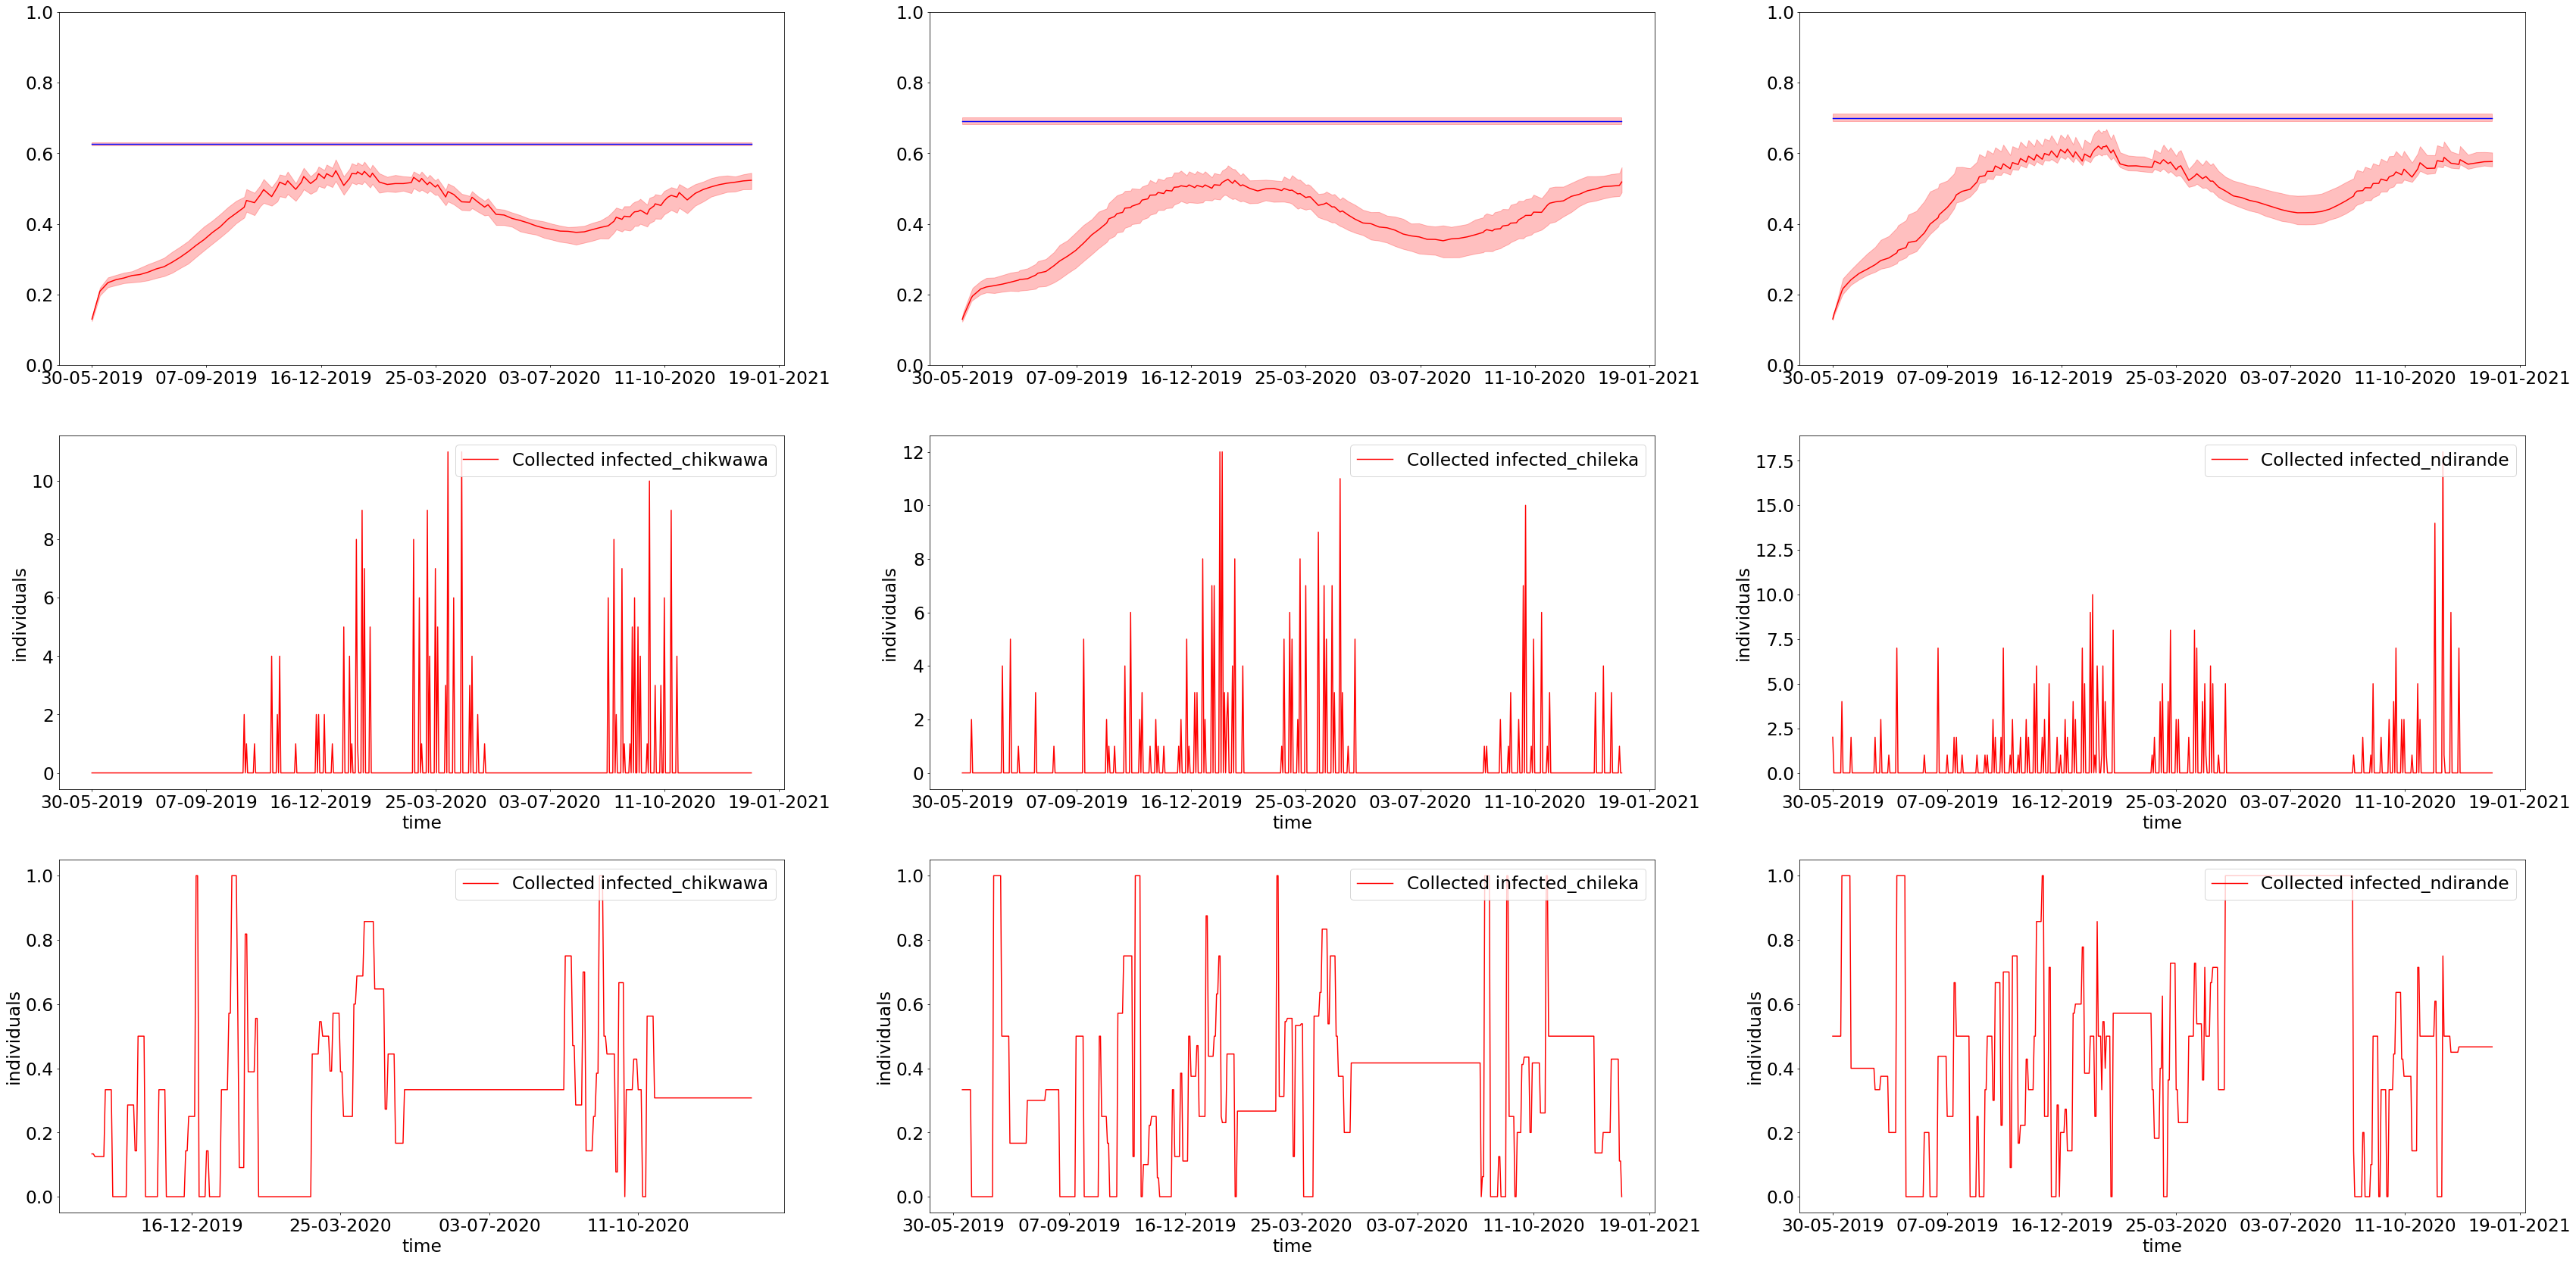

In [90]:
colors = ["red"]

fig, (ax) = plt.subplots(3, 3, figsize=(60, 30), dpi=70)

T = 577

time_chikwawa = creat_time_list(create_delta_t_list(Y_ecoli_chikwawa, 1))
time_chileka  = creat_time_list(create_delta_t_list(Y_ecoli_chileka, 1))
time_ndirande = creat_time_list(create_delta_t_list(Y_ecoli_ndirande, 1))

intermediate_time_chikwawa = creat_time_list(create_delta_t_list(Y_ecoli_chikwawa, 7))
intermediate_time_chileka = creat_time_list(create_delta_t_list(Y_ecoli_chileka, 7))
intermediate_time_ndirande = creat_time_list(create_delta_t_list(Y_ecoli_ndirande, 7))

ax[0,0].xaxis.set_tick_params(labelsize=24)
ax[0,0].yaxis.set_tick_params(labelsize=24)
ax[0,0].set_ylim((0, 1))

ax[0,1].xaxis.set_tick_params(labelsize=24)
ax[0,1].yaxis.set_tick_params(labelsize=24)
ax[0,1].set_ylim((0, 1))

ax[0,2].xaxis.set_tick_params(labelsize=24)
ax[0,2].yaxis.set_tick_params(labelsize=24)
ax[0,2].set_ylim((0, 1))

ax[1,0].set_xlabel('time', fontsize=24)
ax[1,0].set_ylabel('individuals', fontsize=24)
ax[1,0].xaxis.set_tick_params(labelsize=24)
ax[1,0].yaxis.set_tick_params(labelsize=24)
ax[1,0].plot(np.linspace(0, T-1, T), np.nansum(Y_ecoli_chikwawa, axis = 0), label = "Collected infected_chikwawa", color= "red")
ax[1,0].legend(loc = "upper right", fontsize = 24)
ax[1,0].xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax[1,1].set_xlabel('time', fontsize=24)
ax[1,1].set_ylabel('individuals', fontsize=24)
ax[1,1].xaxis.set_tick_params(labelsize=24)
ax[1,1].yaxis.set_tick_params(labelsize=24)
ax[1,1].plot(np.linspace(0, T-1, T), np.nansum(Y_ecoli_chileka, axis = 0), label = "Collected infected_chileka", color= "red")
ax[1,1].legend(loc = "upper right", fontsize = 24)
ax[1,1].xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax[1,2].set_xlabel('time', fontsize=24)
ax[1,2].set_ylabel('individuals', fontsize=24)
ax[1,2].xaxis.set_tick_params(labelsize=24)
ax[1,2].yaxis.set_tick_params(labelsize=24)
ax[1,2].plot(np.linspace(0, T-1, T), np.nansum(Y_ecoli_ndirande, axis = 0), label = "Collected infected_ndirande", color= "red")
ax[1,2].legend(loc = "upper right", fontsize = 24)
ax[1,2].xaxis.set_major_formatter(plt.FuncFormatter(format_func))



ax[2,0].set_xlabel('time', fontsize=24)
ax[2,0].set_ylabel('individuals', fontsize=24)
ax[2,0].xaxis.set_tick_params(labelsize=24)
ax[2,0].yaxis.set_tick_params(labelsize=24)
ax[2,0].plot(np.linspace(0, T-1, T), prevalence_calculation(Y_ecoli_chikwawa), label = "Collected infected_chikwawa", color= "red")
ax[2,0].legend(loc = "upper right", fontsize = 24)
ax[2,0].xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax[2,1].set_xlabel('time', fontsize=24)
ax[2,1].set_ylabel('individuals', fontsize=24)
ax[2,1].xaxis.set_tick_params(labelsize=24)
ax[2,1].yaxis.set_tick_params(labelsize=24)
ax[2,1].plot(np.linspace(0, T-1, T), prevalence_calculation(Y_ecoli_chileka), label = "Collected infected_chileka", color= "red")
ax[2,1].legend(loc = "upper right", fontsize = 24)
ax[2,1].xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax[2,2].set_xlabel('time', fontsize=24)
ax[2,2].set_ylabel('individuals', fontsize=24)
ax[2,2].xaxis.set_tick_params(labelsize=24)
ax[2,2].yaxis.set_tick_params(labelsize=24)
ax[2,2].plot(np.linspace(0, T-1, T), prevalence_calculation(Y_ecoli_ndirande), label = "Collected infected_ndirande", color= "red")
ax[2,2].legend(loc = "upper right", fontsize = 24)
ax[2,2].xaxis.set_major_formatter(plt.FuncFormatter(format_func))

# 
ax[0,0].plot(intermediate_time_chikwawa, quantiles_chikwawa[1,:], color= colors[0])
ax[0,0].fill_between(intermediate_time_chikwawa, y1 = quantiles_chikwawa[0,:], y2 = quantiles_chikwawa[2,:], color= colors[0], alpha = 0.25)
ax[0,0].plot(intermediate_time_chikwawa, steady_state_chikwawa_quantiles[1]*np.ones(intermediate_time_chikwawa.shape), color= "blue")
ax[0,0].fill_between(intermediate_time_chikwawa, y1 = steady_state_chikwawa_quantiles[0]*np.ones(intermediate_time_chikwawa.shape), y2 = steady_state_chikwawa_quantiles[2]*np.ones(intermediate_time_chikwawa.shape), color= colors[0], alpha = 0.25)
ax[0,0].xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax[0,1].plot(intermediate_time_chileka,  quantiles_chileka[1,:], color= colors[0])
ax[0,1].fill_between(intermediate_time_chileka, y1 = quantiles_chileka[0,:], y2 = quantiles_chileka[2,:], color= colors[0], alpha = 0.25)
ax[0,1].plot(intermediate_time_chileka, steady_state_chileka_quantiles[1]*np.ones(intermediate_time_chileka.shape), color= "blue")
ax[0,1].fill_between(intermediate_time_chileka, y1 = steady_state_chileka_quantiles[0]*np.ones(intermediate_time_chileka.shape), y2 = steady_state_chileka_quantiles[2]*np.ones(intermediate_time_chileka.shape), color= colors[0], alpha = 0.25)
ax[0,1].xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax[0,2].plot(intermediate_time_ndirande,  quantiles_ndirande[1,:], color= colors[0])
ax[0,2].fill_between(intermediate_time_ndirande, y1 = quantiles_ndirande[0,:], y2 = quantiles_ndirande[2,:], color= colors[0], alpha = 0.25)
ax[0,2].plot(intermediate_time_ndirande, steady_state_ndirande_quantiles[1]*np.ones(intermediate_time_ndirande.shape), color= "blue")
ax[0,2].fill_between(intermediate_time_ndirande, y1 = steady_state_ndirande_quantiles[0]*np.ones(intermediate_time_ndirande.shape), y2 = steady_state_ndirande_quantiles[2]*np.ones(intermediate_time_ndirande.shape), color= colors[0], alpha = 0.25)
ax[0,2].xaxis.set_major_formatter(plt.FuncFormatter(format_func))



# $R_0$

In [80]:
R_t_chikwawa_quantiles = np.quantile(R_t_chikwawa[:,0,:], (0.01, 0.5, 0.99), axis = 0)
R_t_chileka_quantiles  = np.quantile(R_t_chileka[:,0,:],  (0.01, 0.5, 0.99), axis = 0)
R_t_ndirande_quantiles = np.quantile(R_t_ndirande[:,0,:], (0.01, 0.5, 0.99), axis = 0)

R_t_chikwawa_quantiles_beta_1 = np.quantile(R_t_chikwawa[:,1,:], (0.025, 0.5, 0.975), axis = 0)
R_t_chileka_quantiles_beta_1  = np.quantile(R_t_chileka[:,1,:],  (0.025, 0.5, 0.975), axis = 0)
R_t_ndirande_quantiles_beta_1 = np.quantile(R_t_ndirande[:,1,:], (0.025, 0.5, 0.975), axis = 0)

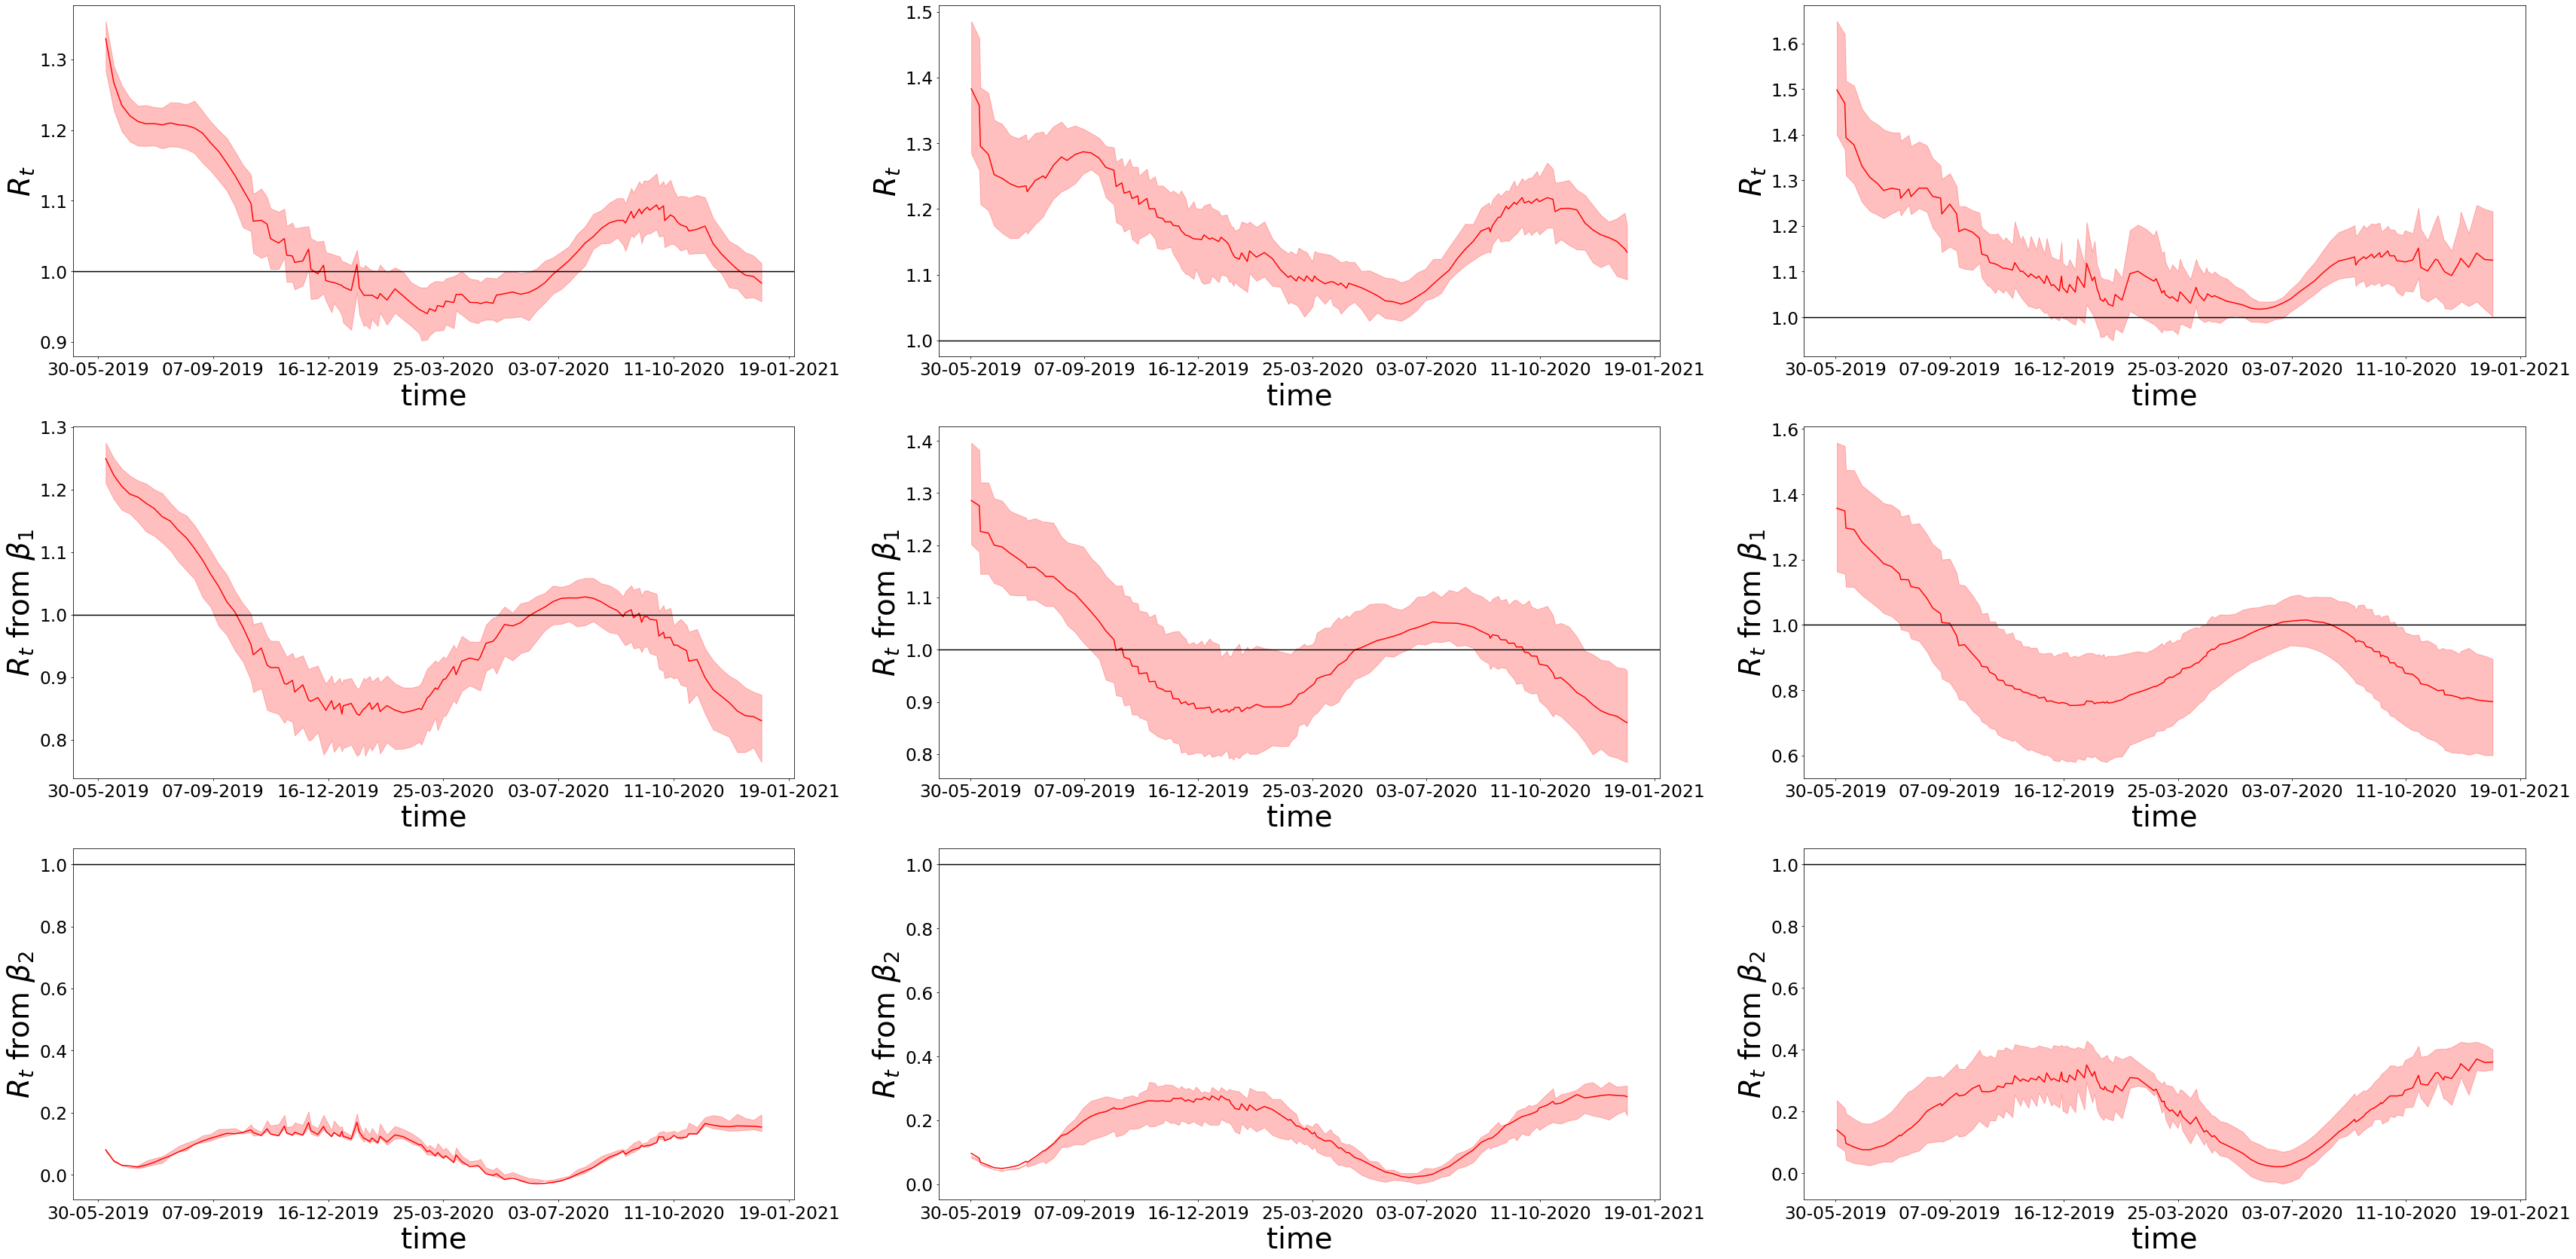

In [96]:
fig, (ax) = plt.subplots(3, 3, figsize=(60, 30), dpi=70)

intermediate_time_chikwawa = creat_time_list(create_delta_t_list(Y_ecoli_chikwawa, 7))
intermediate_time_chileka = creat_time_list(create_delta_t_list(Y_ecoli_chileka, 7))
intermediate_time_ndirande = creat_time_list(create_delta_t_list(Y_ecoli_ndirande, 7))

for j in range(3):
    ax[0, j].xaxis.set_tick_params(labelsize=24)
    ax[0, j].yaxis.set_tick_params(labelsize=24)

    ax[0, j].set_xlabel('time', fontsize=40)
    ax[0, j].set_ylabel(r'$R_t$',  fontsize=40)
    ax[0, j].xaxis.set_major_formatter(plt.FuncFormatter(format_func))

    ax[1, j].xaxis.set_tick_params(labelsize=24)
    ax[1, j].yaxis.set_tick_params(labelsize=24)

    ax[1, j].set_xlabel('time', fontsize=40)
    ax[1, j].set_ylabel(r'$R_t$ from $\beta_1$',  fontsize=40)
    ax[1, j].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    ax[2, j].xaxis.set_tick_params(labelsize=24)
    ax[2, j].yaxis.set_tick_params(labelsize=24)

    ax[2, j].set_xlabel('time', fontsize=40)
    ax[2, j].set_ylabel(r'$R_t$ from $\beta_2$',  fontsize=40)
    ax[2, j].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    
ax[0,0].plot(intermediate_time_chikwawa[1:], R_t_chikwawa_quantiles[1,1:], color= colors[0])
ax[0,0].fill_between(intermediate_time_chikwawa[1:], y1 = R_t_chikwawa_quantiles[0,1:], y2 = R_t_chikwawa_quantiles[2,1:], color= colors[0], alpha = 0.25)
ax[0,0].axhline(y=1, color='black', linestyle='-')

ax[0,1].plot(intermediate_time_chileka[1:], R_t_chileka_quantiles[1,1:], color= colors[0])
ax[0,1].fill_between(intermediate_time_chileka[1:], y1 = R_t_chileka_quantiles[0,1:], y2 = R_t_chileka_quantiles[2,1:], color= colors[0], alpha = 0.25)
ax[0,1].axhline(y=1, color='black', linestyle='-')

ax[0,2].plot(intermediate_time_ndirande[1:], R_t_ndirande_quantiles[1,1:], color= colors[0])
ax[0,2].fill_between(intermediate_time_ndirande[1:], y1 = R_t_ndirande_quantiles[0,1:], y2 = R_t_ndirande_quantiles[2,1:], color= colors[0], alpha = 0.25)
ax[0,2].axhline(y=1, color='black', linestyle='-')



ax[1,0].plot(intermediate_time_chikwawa[1:], R_t_chikwawa_quantiles_beta_1[1,1:], color= colors[0])
ax[1,0].fill_between(intermediate_time_chikwawa[1:], y1 = R_t_chikwawa_quantiles_beta_1[0,1:], y2 = R_t_chikwawa_quantiles_beta_1[2,1:], color= colors[0], alpha = 0.25)
ax[1,0].axhline(y=1, color='black', linestyle='-')

ax[1,1].plot(intermediate_time_chileka[1:], R_t_chileka_quantiles_beta_1[1,1:], color= colors[0])
ax[1,1].fill_between(intermediate_time_chileka[1:], y1 = R_t_chileka_quantiles_beta_1[0,1:], y2 = R_t_chileka_quantiles_beta_1[2,1:], color= colors[0], alpha = 0.25)
ax[1,1].axhline(y=1, color='black', linestyle='-')

ax[1,2].plot(intermediate_time_ndirande[1:], R_t_ndirande_quantiles_beta_1[1,1:], color= colors[0])
ax[1,2].fill_between(intermediate_time_ndirande[1:], y1 = R_t_ndirande_quantiles_beta_1[0,1:], y2 = R_t_ndirande_quantiles_beta_1[2,1:], color= colors[0], alpha = 0.25)
ax[1,2].axhline(y=1, color='black', linestyle='-')


ax[2,0].plot(intermediate_time_chikwawa[1:], -R_t_chikwawa_quantiles_beta_1[1,1:]+R_t_chikwawa_quantiles[1,1:], color= colors[0])
ax[2,0].fill_between(intermediate_time_chikwawa[1:], y1 = -R_t_chikwawa_quantiles_beta_1[0,1:]+R_t_chikwawa_quantiles[0,1:], y2 = -R_t_chikwawa_quantiles_beta_1[2,1:]+R_t_chikwawa_quantiles[2,1:], color= colors[0], alpha = 0.25)
ax[2,0].axhline(y=1, color='black', linestyle='-')

ax[2,1].plot(intermediate_time_chileka[1:], -R_t_chileka_quantiles_beta_1[1,1:]+R_t_chileka_quantiles[1,1:], color= colors[0])
ax[2,1].fill_between(intermediate_time_chileka[1:], y1 = -R_t_chileka_quantiles_beta_1[0,1:]+R_t_chileka_quantiles[0,1:], y2 = -R_t_chileka_quantiles_beta_1[2,1:]+R_t_chileka_quantiles[2,1:], color= colors[0], alpha = 0.25)
ax[2,1].axhline(y=1, color='black', linestyle='-')

ax[2,2].plot(intermediate_time_ndirande[1:], -R_t_ndirande_quantiles_beta_1[1,1:]+R_t_ndirande_quantiles[1,1:], color= colors[0])
ax[2,2].fill_between(intermediate_time_ndirande[1:], y1 = -R_t_ndirande_quantiles_beta_1[0,1:]+R_t_ndirande_quantiles[0,1:], y2 = -R_t_ndirande_quantiles_beta_1[2,1:]+R_t_ndirande_quantiles[2,1:], color= colors[0], alpha = 0.25)
ax[2,2].axhline(y=1, color='black', linestyle='-')



In [97]:
from tabulate import tabulate
from pylatex import Document, Subsection, Table, Tabular, Center, NoEscape, Math

In [98]:
R_t_mean_chikwawa = round(np.mean(R_t_chikwawa[:,0,1:]), 2)
R_t_std_chikwawa  = round(np.std( R_t_chikwawa[:,0,1:]), 2)

R_t_mean_chileka  = round(np.mean(R_t_chileka[:,0,1:]), 2)
R_t_std_chileka   = round(np.std( R_t_chileka[:,0,1:]), 2)

R_t_mean_ndirande = round(np.mean(R_t_ndirande[:,0,1:]), 2)
R_t_std_ndirande  = round(np.std( R_t_ndirande[:,0,1:]), 2)

R_t_beta_1_mean_chikwawa = round(np.mean(R_t_chikwawa[:,1,1:]), 2)
R_t_beta_1_std_chikwawa  = round(np.std( R_t_chikwawa[:,1,1:]), 2)

R_t_beta_1_mean_chileka  = round(np.mean(R_t_chileka[:,1,1:]), 2)
R_t_beta_1_std_chileka   = round(np.std( R_t_chileka[:,1,1:]), 2)

R_t_beta_1_mean_ndirande = round(np.mean(R_t_ndirande[:,1,1:]), 2)
R_t_beta_1_std_ndirande  = round(np.std( R_t_ndirande[:,1,1:]), 2)



In [99]:
R_t_over_time_string = ["R_t over time", str(R_t_mean_chikwawa)+"+/-"+str(R_t_std_chikwawa), str(R_t_mean_chileka)+"+/-"+str(R_t_std_chileka), str(R_t_mean_ndirande)+"+/-"+str(R_t_std_ndirande)]
R_t_over_time_string_beta_1 = ["R_t from beta_1", str(R_t_beta_1_mean_chikwawa)+"+/-"+str(R_t_beta_1_std_chikwawa), str(R_t_beta_1_mean_chileka)+"+/-"+str(R_t_beta_1_std_chileka), str(R_t_beta_1_mean_ndirande)+"+/-"+str(R_t_beta_1_std_ndirande)]

In [100]:
table = [R_t_over_time_string,
         R_t_over_time_string_beta_1]

print(tabulate(table, headers=['R_t', "Chikwawa (mean+/-std)", "Chileka (mean+/-std)", "Ndirande (mean+/-std)",]))

R_t              Chikwawa (mean+/-std)    Chileka (mean+/-std)    Ndirande (mean+/-std)
---------------  -----------------------  ----------------------  -----------------------
R_t over time    1.04+/-0.09              1.17+/-0.07             1.12+/-0.1
R_t from beta_1  0.95+/-0.1               0.99+/-0.11             0.9+/-0.16
